# Spread of an infectious disease by diffusion and non-local mobility between two islands

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Project description

In this small projected I created a SIR model with diffsuion of an infectious disease that spreads over a flat lattice. In the middle of th elattice there is an "aiport", at which people can be tranported to a nearby "island" (i. e. a second lattice), so the disease also spreads there although there is no direct connection between the two lattices.

The contact rate between two people in this model is $\beta = 5$, the removal rate (recovery or death) of the disease is $\gamma = 0.02$. Our two "islands" are represented by two 100x100 pixel lattices, where each pixel is inhabited by $N = 100$ people. Every person is suceptible to the disease at the start od the simulation. I model local mobility with a diffusion ansatz and assume a diffusion rate (for compartments S, I and R alike) of $D_S = D_I = D_R = 10^{-6}$. The differential equations of the SIR model with added diffusion terms look like the following:

\begin{aligned}
 \frac{\partial S}{\partial t} &= -\frac{\beta S I}{N} + D_S {\nabla}^2 S \\
\frac{\partial I}{\partial t} &= \frac{\beta S I}{N} - \gamma I + D_I {\nabla}^2 I \\
\frac{\partial R}{\partial t} &= \gamma I + D_R {\nabla}^2 R
\end{aligned}


The simulation mainly follows the explicit time step method described in the **Swift-Hohenberg** notebook.

### Non-local mobility through air traffic

Additionally to the description of local mobility by diffusion, I added an instance of non-local mobility by implementing "airport" pixels that tranport people from island 1 to island 2 and vice versa. After every time step, the compartmental populations (S, I, R) on the airport pixels of one lattice are exchanged with the corresponding airports on the other.

There are three airport connections in total:

1. Pos. (50, 50) on island 1 <--> Pos. (50, 50) on island 2
2. Pos. (75, 75) on island 1 <--> Pos. (25, 25) on island 2
3. Pos. (76, 76) on island 1 <--> Pos. (51, 51) on island 2

##  Animated simulation results

The simulation starts with one infected person in the upper left corner of the first grid. This is what the disease dynamics of compartment I, the currently infected people, look like for 800 simulation time units:

![Disease dynamics animation](../output/animation.gif "Disease dynamics animation")

(Island 1 is the upper lattice, island 2 the lower one.)

The source code for the siulation, including animating the results, can be found in src/simulation.py

The airports lead to multiple local outbreaks on each island, which the diffuse over the whole lattice. Notice that two wavfronts going in the opposite direction weaken each other, which is why e. g. the outbreak on island 1 starting at (76, 76) does not reach the airport at (50,50) because it cancels out with the original epidemic wav front.

## Analysis

We now want to take a closer look at the disease dynamics and make comparisons between the spreading behaviour on each of the two islands. To that end, I summed up the total number of people in each compartment after every time step and saved the resutls under output/data/ana_data.py.

In [3]:
# read data for analysis
df = pd.read_csv("../output/data/ana_data.csv")

# island 1
N = df["S"] + df["I"] + df["R"]
S = df["S"]
I = df["I"]
R = df["R"]

#island 2
N2 = df["S2"] + df["I2"] + df["R2"]
S2 = df["S2"]
I2 = df["I2"]
R2 = df["R2"]

# time
t = df["time"]

### Infected

Let's take a look at the temporal dynamics of the infected compartment

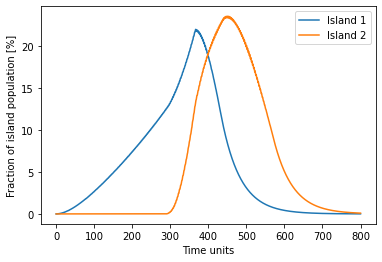

In [4]:
i1 = I/N*100
i2 = I2/N2*100

plt.plot(t, i1, label="Island 1")
plt.plot(t, i2, label= "Island 2")
plt.ylabel("Fraction of island population [%]")
plt.xlabel("Time units")
plt.legend()
plt.show()

It can be seen that the oubreak on island 2 sets in with a delay compared to island 1 because the epidemic has to reach one of the airports beforehand. Interestingly, both curves have quite different shapes. The infection curve for island 1 shows a noticeable kink after 300 time units, where the infection rate suddenly increases. This can be related to the coupling of the islands through airports. Shortly after the epidemic hits the airport at (50, 50) and is transported to the second island, it comes back through the connection between (51, 51) on island 2 to (76, 76) on island 1, causing a second outbreak on island 1. The curve fpr island 2 has a much steeper rise because there are more infection centres from the beginning on.

### Infected and removed

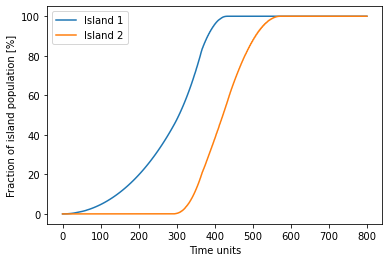

In [6]:
ir1 = (I + R)/N*100
ir2 = (I2 + R2)/N2*100

plt.plot(t, ir1, label="Island 1")
plt.plot(t, ir2, label= "Island 2")
plt.ylabel("Fraction of island population [%]")
plt.xlabel("Time units")
plt.legend()
plt.show()

The sam dynamics as discussed above can also be seen here. Island 1 starts slow and when the coupling mechanism of bidirectional air traffic sets in, it gains momentum.